## Horizontal, Multilateral and Intelligent Wells 
#### Project 1.1 
#### Author:  <span style="color:blue"> Enrique Losoya - 01/31/2018 </span>.
###### Assigment 1 
######  Program Furui's model for Horizontal Well performance 


For an anisotropic reservoir the Furui equation is given by: 

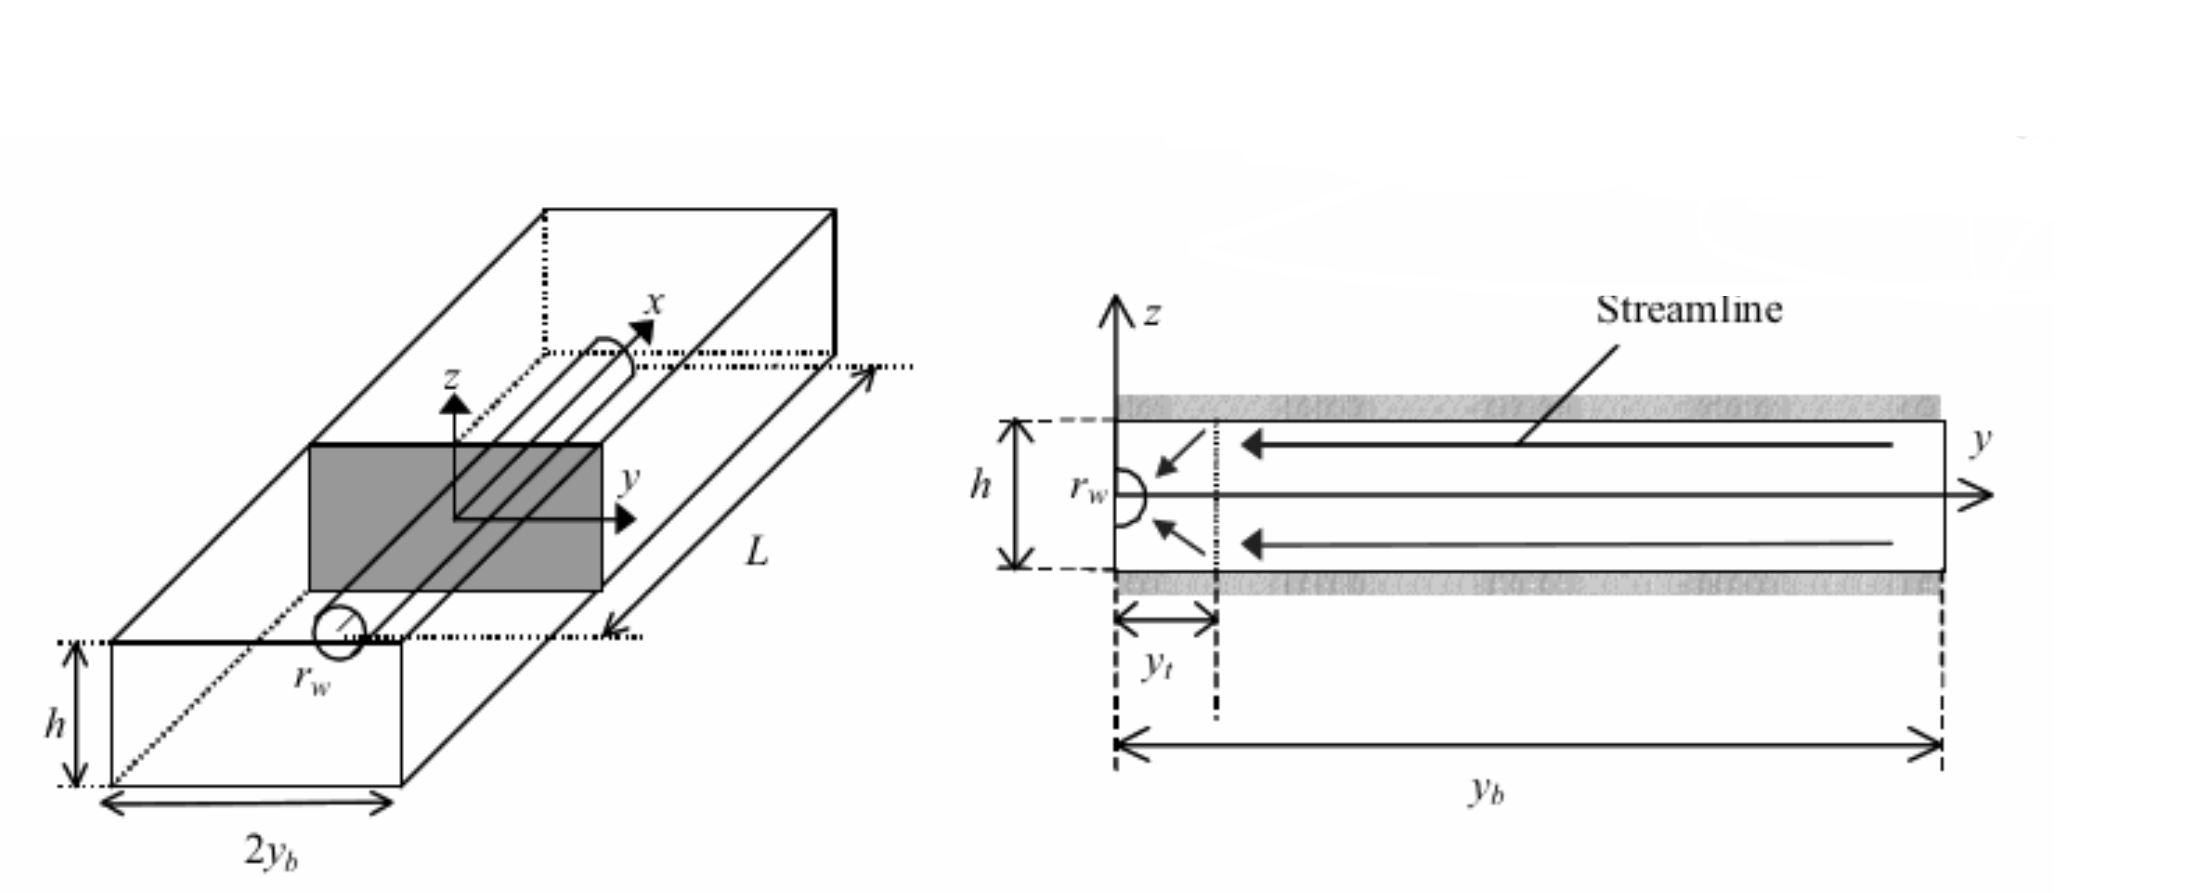

In [1]:
from IPython.display import Image
Image("images/furui.jpg") 

<h5><center>Furui representatio of flow in a rectangular shaped reservoir - From Furui et at. (2003) </center></h5> 

Furui well performance equation is given by: 

$$q =\frac{ k L (P_e - P_{wf} ) }{ 141.2 \mu B_o ln [\frac{h I_{ani} } { r_w( I_{ani} + 1) }] + \frac{\pi y_b}{h I_{ani} } - 1.224 + s}  $$

Where : 

| Symbol    | Meaning                     | Units       |
|---------|-----------------------------|-------------|
| k         | Permeability                | md          |
| L         | Length                      | ft          |
| h         | Reservoir thickness         | ft          |
| $P_e$     | Boundary reservoir pressure | psia        |
| $P_{wf}$  | Wellbore pressure           | psia        |
| $\mu$     | Viscosity                   | cp          |
| $B_o$     | Oil gas ratio               | STB/RSTB    |
| $I_{ani}$ | Anisotropic permeability    |             |
| $R_w$     | Wellbore radius             | ft          |
| s         | Skin factor                 |             |
| q         | Flow rate                   | stb/day/psi |

<h4><center>Typical Units for Production Engineering Calculations</center></h4><table>

| Variable        | Oilfield Unit | SI Unit | Conversion (Multiply SI Unit) |
|-----------------|---------------|---------|-------------------------------|
| Area            | acre          | m2      | 2.475 × 10–4                  |
| Compressibility | psi–1         | Pa–1    | 6897                          |
| Length          | ft            | m       | 3.28                          |
| Permeability    | md            | m2      | 1.01 × 1015                   |
| Pressure        | psi           | Pa      | 1.45 × 10–4                   |
| Rate (oil)      | STB/d         | m3/s    | 5.434 × 105                   |
| Rate (gas)      | Mscf/d        | m3/s    | 3049                          |
| Viscosity       | cp            | Pa-s    | 1000                          |

The well variables are defined in a text file called "well_config.ini" in the working directory. You could change them there or use option b to input them directly by selecting 

In [2]:
import ipywidgets as widgets
from IPython.display import display
Well_Config_Buttom = widgets.ToggleButtons(
    options=['Well A (Default)', 'Well B', 'Well C','Custom'],
    description='Well Config:',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=["Well A (Default)", "Well B", "Well C", "Dafult variables will require the users' input"],
#     icons=['check'] * 3
)
display(Well_Config_Buttom)

A Jupyter Widget

In [21]:
try:
    from configparser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0
def f(x):
    return x
from IPython.display import HTML, display
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider
from bokeh.models import CustomJS, ColumnDataSource, Slider

Wellconfig = ConfigParser()
Wellconfig.read('well_config.ini')

Well_Name = 'Well A'
if Well_Config_Buttom.value == 'Well A (Default)' :
    print('Using default values from .Ini file')
    kh = Wellconfig.getfloat(Well_Name, 'kh')
    kv = Wellconfig.getfloat(Well_Name, 'kv')
    Iani = Wellconfig.getfloat(Well_Name, 'Iani')
    L = Wellconfig.getfloat(Well_Name, 'L')
    Bo = Wellconfig.getfloat(Well_Name, 'B')
    mu = Wellconfig.getfloat(Well_Name, 'mu')
    s = Wellconfig.getfloat(Well_Name, 's')
    rw = Wellconfig.getfloat(Well_Name, 'rw')
    yb = Wellconfig.getfloat(Well_Name, 'yb')
    h = Wellconfig.getfloat(Well_Name, 'h')
    Pe = Wellconfig.getfloat(Well_Name, 'Pe')
    Pwf = Wellconfig.getfloat(Well_Name, 'Pwf')  
    #Write variables to a new .ini file in the working directory
    with open('Well_profile_used.ini', 'w') as configfile: 
        Wellconfig.write(configfile)
    #Display the inputted data to the user 
    print('I am now using the following variables:')
    data = [[Well_Name,'', ' data'  ], 
         [ '','Kh   = ', kh  ,' ' , 'Kv = ', kv],
         [ '','Iani = ', Iani,' ' ,'L = ', L],
         [ '','B    = ', Bo   ,' ' ,'u = ', mu],
         [ '','s    = ', s   ,' ' ,'Rw = ', rw],
         [ '','Yb    =', yb  ,' ' ,'h = ', h],
         [ '','Pe    =', Pe  ,' ' ,'Pwf = ', Pwf],
       ]
    display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
                    )))
else:
    print('Pleas modify well parameters manually:')
    kh_Slider=  widgets.FloatSlider( value=10.0, min=0, max=100.0, step=0.1, description='$K_h$:', disabled=False,
    continuous_update=False, orientation='horizontal', readout=True, readout_format='0.1f')
    kv_Slider  = widgets.FloatSlider( description='$K_v$:', value=1.0, min=0, max=100.0, step=0.1, continuous_update=False)
    Iani_Slider= widgets.FloatSlider( description='$I_{ani}$:', value=3.16, min=0, max=100.0, step=0.1, continuous_update=False)
    #Iani_Slider.observe(handle_slider_change, names='value')
    L_Slider   = widgets.FloatSlider( description='$L$:',   value=3000.0, min=0, max=30000.0, step=1.0, continuous_update=False)
    Bo_Slider  = widgets.FloatSlider( description='$B_o$:', value=1.1, min=0, max = 100.0, step=0.1, continuous_update=False)
    mu_Slider  = widgets.FloatSlider( description='$\mu$:', value=2.0, min=0, max = 100.0, step=0.1, continuous_update=False)
    s_Slider   = widgets.FloatSlider( description='$s$:',   value=0.0, min=0, max = 100.0, step=0.1,continuous_update=False)
    rw_Slider  = widgets.FloatSlider( description='$R_w$:', value=0.25, min=0, max=5.0, step=0.1,continuous_update=False)
    yb_Slider  = widgets.FloatSlider( description='$Y_b$:', value=1000.0, min=0, max=30000.0, step=0.1,continuous_update=False)
    h_Slider  = widgets.FloatSlider( description='$h$:',    value=100.0, min=0.00001, max=1000.0, step=0.1,continuous_update=False)
    Pe_Slider  = widgets.FloatSlider( description='$P_e$:', value=1000.0, min=0, max=20000.0, step=0.1,continuous_update=False)
    Pwf_Slider  = widgets.FloatSlider( description='$P_{wf}$:', value=1250.0, min=0, max=20000.0, step=0.1, continuous_update=False)
    sliders_items = [kh_Slider, kv_Slider, Iani_Slider , L_Slider]
    sliders_items_2 = [ mu_Slider, s_Slider, rw_Slider, yb_Slider]
    sliders_items_3 = [h_Slider, Pe_Slider, Pwf_Slider,Bo_Slider ]
    left_box = widgets.VBox(sliders_items)
    middle_box = widgets.VBox(sliders_items_2)
    right_box = widgets.VBox(sliders_items_3)
    sliders= [kh_Slider, kv_Slider, Iani_Slider, L_Slider, Bo_Slider, mu_Slider,
    s_Slider, rw_Slider, yb_Slider, h_Slider, Pe_Slider, Pwf_Slider ]
    display(widgets.HBox([left_box, middle_box, right_box]))

  
    

Loading BokehJS ...

Pleas modify well parameters manually:


A Jupyter Widget

In [22]:
    kh   = kh_Slider.value
    kv   = kv_Slider.value
    Iani = Iani_Slider.value
    L    = L_Slider.value
    Bo   = Bo_Slider.value
    mu   =  mu_Slider.value
    s    = s_Slider.value
    rw   = rw_Slider.value
    yb   = yb_Slider.value
    h    = h_Slider.value
    Pe   =  Pe_Slider.value
    Pwf  = Pwf_Slider.value

In [23]:
def on_button_clicked(b):
    if Well_Config_Buttom.value == 'Custom' :
        kh   = kh_Slider.value
        kv   = kv_Slider.value
        Iani = Iani_Slider.value
        L    = L_Slider.value
        Bo   = Bo_Slider.value
        mu   =  mu_Slider.value
        s    = s_Slider.value
        rw   = rw_Slider.value
        yb   = yb_Slider.value
        h    = h_Slider.value
        Pe   =  Pe_Slider.value
        Pwf  = Pwf_Slider.value
     #Write variables to a new .ini file in the working directory
        with open('Well_profile_used.ini', 'w') as configfile: 
            Wellconfig.write(configfile)
        #Display the inputted data to the user 
        print('I am now using the following variables:')
        data = [[Well_Name,'', ' data'  ], 
         [ '','Kh   = ', kh  ,' ' , 'Kv = ', kv],
         [ '','Iani = ', Iani,' ' ,'L = ', L],
         [ '','B    = ', Bo   ,' ' ,'u = ', mu],
         [ '','s    = ', s   ,' ' ,'Rw = ', rw],
         [ '','Yb    =', yb  ,' ' ,'h = ', h],
         [ '','Pe    =', Pe  ,' ' ,'Pwf = ', Pwf],
       ]
        display(HTML(
        '<table><tr>{}</tr></table>'.format(
            '</tr><tr>'.join(
                '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
                    )))
        print(L)

    else :
        print('Using default values form text file')
      
update_bottom =widgets.Button(
    description='Update inputs!',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Refresh inputs from sliders" values',
    icon='check'
    )
display(update_bottom)
update_bottom.on_click(on_button_clicked)


A Jupyter Widget

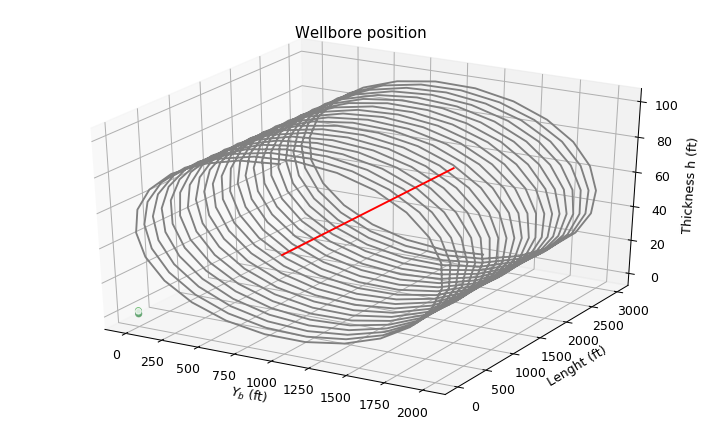

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6), dpi=90, facecolor='w')
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
interp= 500; 
#Area representing reservoir "drainage"
zline =  np.linspace(0, L, interp)
xline =  yb*np.sin(zline)+ np.repeat(yb,interp)
yline =  h/2*np.cos(np.linspace(0, L, interp)) + np.repeat(h/2,interp)

#Actual Well 
z_w =  np.linspace(0, L, interp)
x_w =  np.repeat(yb,interp)
y_w =  np.repeat(h/2,interp)
ax.set(xlabel='$Y_b$ (ft)', ylabel='Lenght (ft)', zlabel= "Thickness h (ft)", 
       title='Wellbore position')
ax.plot3D(xline, zline, yline, 'grey')
ax.plot3D(x_w, z_w, y_w, 'red')

zdata = np.random.random(10)
xdata = np.sin(zdata) +  np.random.randn(10)
ydata = np.cos(zdata) +  np.random.randn(10)
ax.scatter3D(xdata, zdata, ydata, c=zdata, cmap='Greens');



In [26]:
import math 
k_bar = math.sqrt(kh/kv)
# No delta P was given so, using 1 psi 
Pe = 2
Pwf = 1
NUM = k_bar * L * (Pe - Pwf) 
Dem_1 = 141.2 * Bo * mu 
Dem_2 = math.log(Iani / (rw * ( Iani + 1))) + (math.pi * yb)/(Iani * h) - 1.224 + s
Q= NUM/(Dem_1*Dem_2)

print('Q = ', Q, 'STB/D/Psi')

Q =  3.1070633915396666 STB/D/Psi


In [28]:
import numpy as np 

delta_P= np.linspace(0, 50, 20)
NUM = k_bar * L * (delta_P) 
Dem_1 = 141.2 * Bo * mu 
Dem_2 = math.log( Iani / (rw * ( Iani + 1))) + (math.pi * yb)/(Iani * h) - 1.224 + s
Q= NUM/(Dem_1*Dem_2)

p = figure(title = "ΔP vs Flow performance, Q", width=800, height=500)
p.circle(delta_P, Q, size=7, color="firebrick", alpha=0.5)
p.xaxis.axis_label = 'ΔP (Psi)'
p.yaxis.axis_label = 'Qo (STB/Day)'
show(p)

In [39]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

kh_Slider=  widgets.FloatSlider( value=10.0, min=0, max=100.0, step=0.1, description='$K_h$:', disabled=False,
continuous_update=False, orientation='horizontal', readout=True, readout_format='0.1f')
kv_Slider  = widgets.FloatSlider( description='$K_v$:', value=1.0, min=0, max=100.0, step=0.1, continuous_update=False)
Iani_Slider= widgets.FloatSlider( description='$I_{ani}$:', value=3.16, min=0, max=100.0, step=0.1, continuous_update=False)
#Iani_Slider.observe(handle_slider_change, names='value')
L_Slider   = widgets.FloatSlider( description='$L$:',   value=3000.0, min=0, max=30000.0, step=1.0, continuous_update=False)
Bo_Slider  = widgets.FloatSlider( description='$B_o$:', value=1.1, min=0, max = 100.0, step=0.1, continuous_update=False)
mu_Slider  = widgets.FloatSlider( description='$\mu$:', value=2.0, min=0, max = 100.0, step=0.1, continuous_update=False)
s_Slider   = widgets.FloatSlider( description='$s$:',   value=0.0, min=0, max = 100.0, step=0.1,continuous_update=False)
rw_Slider  = widgets.FloatSlider( description='$R_w$:', value=0.25, min=0, max=5.0, step=0.1,continuous_update=False)
yb_Slider  = widgets.FloatSlider( description='$Y_b$:', value=1000.0, min=0, max=30000.0, step=0.1,continuous_update=False)
h_Slider  = widgets.FloatSlider( description='$h$:',    value=100.0, min=0.00001, max=1000.0, step=0.1,continuous_update=False)
Pe_Slider  = widgets.FloatSlider( description='$P_e$:', value=1000.0, min=0, max=20000.0, step=0.1,continuous_update=False)
Pwf_Slider  = widgets.FloatSlider( description='$P_{wf}$:', value=1250.0, min=0, max=20000.0, step=0.1, continuous_update=False)
sliders_items = [kh_Slider, kv_Slider, Iani_Slider , L_Slider]
sliders_items_2 = [ mu_Slider, s_Slider, rw_Slider, yb_Slider]
sliders_items_3 = [h_Slider, Pe_Slider, Pwf_Slider,Bo_Slider ]
left_box = widgets.VBox(sliders_items)
middle_box = widgets.VBox(sliders_items_2)
right_box = widgets.VBox(sliders_items_3)
sliders= [kh_Slider, kv_Slider, Iani_Slider, L_Slider, Bo_Slider, mu_Slider,
s_Slider, rw_Slider, yb_Slider, h_Slider, Pe_Slider, Pwf_Slider ]


def f(kh, kv, Iani, L, Bo, mu, s, rw, yb, h, Pe, Pwf ):
    plt.figure(2)
    x = np.linspace(1, 100, num=10)
    k_bar = np.sqrt(kh/kv)
    Num_1 = (k_bar * L * x)
    Dem_2 = (141.2 * Bo * mu )* (np.log( Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    plt.plot(x, Num_1 /Dem_2 )
        
interactive_plot_1 = interactive(f,  kh= sliders[0], kv = sliders[1], Iani =sliders[2], 
                                   L = sliders[3], mu = sliders[4], Bo = sliders[5], 
                                   s = sliders[6], rw = sliders[7], yb =  sliders[8],
                                   h = sliders[9], Pe = sliders[10], Pwf=sliders[11])    

interactive_plot_1


A Jupyter Widget

In [40]:
from bokeh.plotting import figure, output_file, show
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

x = np.linspace(1, 100, num=10)

def fBokeh(kh, kv, Iani, L, Bo, mu, s, rw, yb, h, Pe, Pwf ):
    k_bar = np.sqrt(kh/kv)
    Num_1 = (k_bar * L * x)
    Dem_2 = (141.2 * Bo * mu )*( np.log( Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Y = Num_1/Dem_2
    
    p = figure(plot_width=700, plot_height=400)
    # add both a line and circles on the same plot
    p.line(x, Y, line_width=2)
    p.circle(x, Y, fill_color="white", size=8)
    p.xaxis.axis_label = "ΔP (Psi)"
    p.yaxis.axis_label = "Production, Q (STB/Day)"

    show(p)


DrawdownPerformance_Plot = interact(fBokeh,  kh= sliders[0], kv = sliders[1], Iani =sliders[2], 
                                   L = sliders[3], mu = sliders[4], Bo = sliders[5], 
                                   s = sliders[6], rw = sliders[7], yb =  sliders[8],
                                   h = sliders[9], Pe = sliders[10], Pwf=sliders[11],continuous_update=False)    
DrawdownPerformance_Plot

A Jupyter Widget

<function __main__.fBokeh>

In [30]:
interactive_plot_1

A Jupyter Widget

##### a.	Wellbore length 

In [33]:
from bokeh.plotting import figure, output_file, show
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

L_lin = np.linspace(1, 4000, num=10)

def fBokeh(kh, kv, Iani, L, Bo, mu, s, rw, yb, h, Pe, Pwf ):
    k_bar = np.sqrt(kh/kv)
    Num_1 = (k_bar * L_lin * 1)
    Dem_2 = (141.2 * Bo * mu )* (np.log( Iani / (rw * ( Iani + 1))) + (np.pi * yb)/(Iani * h) - 1.224 + s)
    Y = Num_1/Dem_2
    fig = figure(plot_width=700, plot_height=400)
    # add both a line and circles on the same plot
    fig.line(L_lin, Y, line_width=2)
    fig.circle(L_lin, Y, fill_color="green", size=8)
    # add both a line and circles on the same plot
    fig.line(L_lin, Y, line_width=2)
    fig.xaxis.axis_label = "Lenght (ft)"
    fig.yaxis.axis_label = "Production, Q (STB/Psi)"
    show(fig)


WellboreLenght_Plot = interact(fBokeh,  kh= sliders[0], kv = sliders[1], Iani =sliders[2], 
                                   L = sliders[3], mu = sliders[4], Bo = sliders[5], 
                                   s = sliders[6], rw = sliders[7], yb =  sliders[8],
                                   h = sliders[9], Pe = sliders[10], Pwf=sliders[11],continuous_update=False)    
WellboreLenght_Plot

A Jupyter Widget

<function __main__.fBokeh>

In [34]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()

x = [x*1 for x in range(0, 200)]



y = x
z=x

k_bar = math.sqrt(kh*kv/kv+kh)

source = ColumnDataSource(data=dict(x=x, y=y))

source2 = ColumnDataSource(data=dict(x=x, y=y, z=z))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)




NUM = k_bar * L * (Pe - Pwf) 
Dem_1 = 141.2 * Bo * mu 
Dem_2 = math.log( Iani*h / (rw * ( Iani + 1))) + (math.pi * yb)/(Iani * h) - 1.224 + s
Q = k_bar * L * (50) /(Dem_1*Dem_2)

print(NUM)
print(Dem_1)
print(Dem_2)


callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var k_bar  = Math.sqrt(10)
    var L = 3200
    var Pe = 2
    var Pwf = 1
    var Bo = 1.1
    var s = 0.0 
    var Yb = 500.0
    var Pe = 1000.0
    var Rw = 0.25 
    var h = 100 
    var u = 2.0 

    var Dem_1 = 141.2 * Bo * u 
    var Iani = cb_obj.value
    var Dem_2 = Math.log( Iani / (Rw * ( Iani + 1))) + (Math.PI * Yb)/(Iani * h) - 1.224 + s

    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
    Dem_2 = Math.log( Iani / (Rw * ( Iani))) + (Math.PI * Yb)/(Iani * h) - 1.224 + s
        y[i] =  1/x[i] * (k_bar * L ) /( Dem_1 * Dem_2) 
    
}
    source.change.emit();
""")

slider = Slider(start=0.01, end= 10, value=1, step= 0.1, title="Iani")
slider.js_on_change('value', callback)


layout = column(slider, plot)

show(layout)

Loading BokehJS ...

13416.407864998739
310.64
14.434270404198799


In [35]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

A Jupyter Widget

A Jupyter Widget

### References


-  [1]  Hill, A.D., et al. Multilateral Wells, Society of Petroleum Engineers, 2007. ProQuest Ebook Central, [tamu.library.com](https://ebookcentral.proquest.com.ezproxy.library.tamu.edu/lib/tamucs/detail.action?docID=3404994).


In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot